In [3]:
# for some basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
!pip install dabl
import dabl

In [5]:
# To read the data set
data = pd.read_csv('/StudentsPerformance.csv')

In [6]:
# getting the shape of the data
print(data.shape)

(1000, 9)


In [7]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [8]:
# Descriptive Statistics
data.describe() 


,math score,reading score,writing score,total_score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000
std,15.16308,14.600192,15.195657,42.771978
min,0.00000,17.000000,10.000000,27.000000
25%,57.00000,59.000000,57.750000,175.000000
50%,66.00000,70.000000,69.000000,205.000000
75%,77.00000,79.000000,79.000000,233.000000
max,100.00000,100.000000,100.000000,300.000000


In [9]:
# Lets check the no. of unique items present in the categorical column
data.select_dtypes('object').nunique() 

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [10]:
# lets check the percentage of missing data in each columns present in the data :
no_of_columns = data.shape[0]
percentage_of_missing_data = data.isnull().sum()/no_of_columns
print(percentage_of_missing_data)

gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
total_score                    0.0
dtype: float64


Target looks like regression


[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8eed3cf90>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8eec27ad0>,
       dtype=object)]

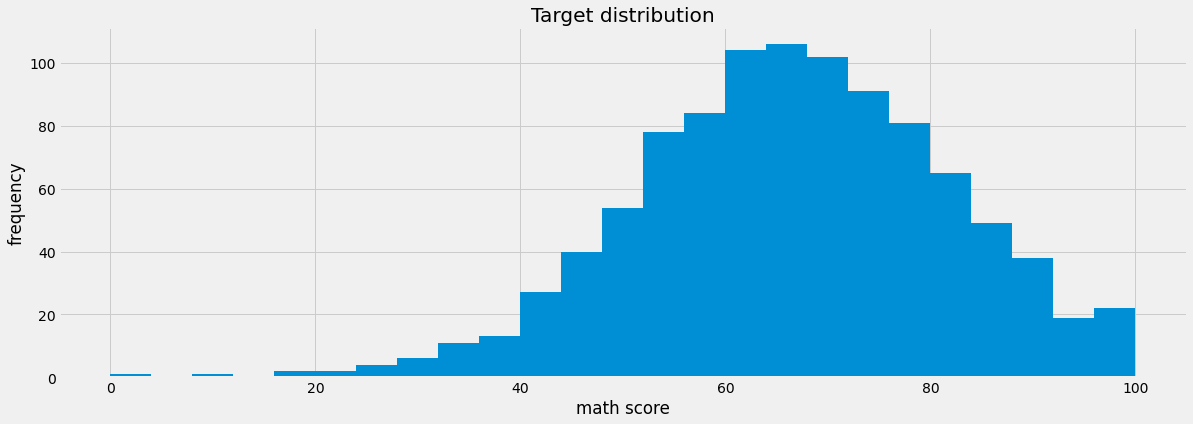

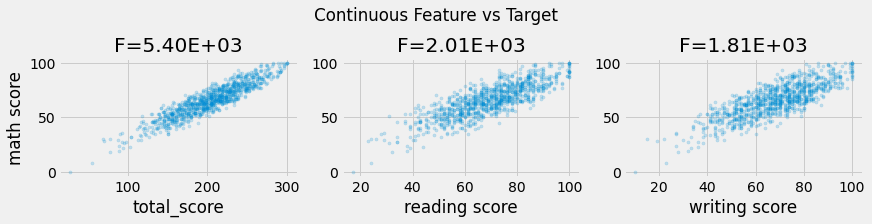

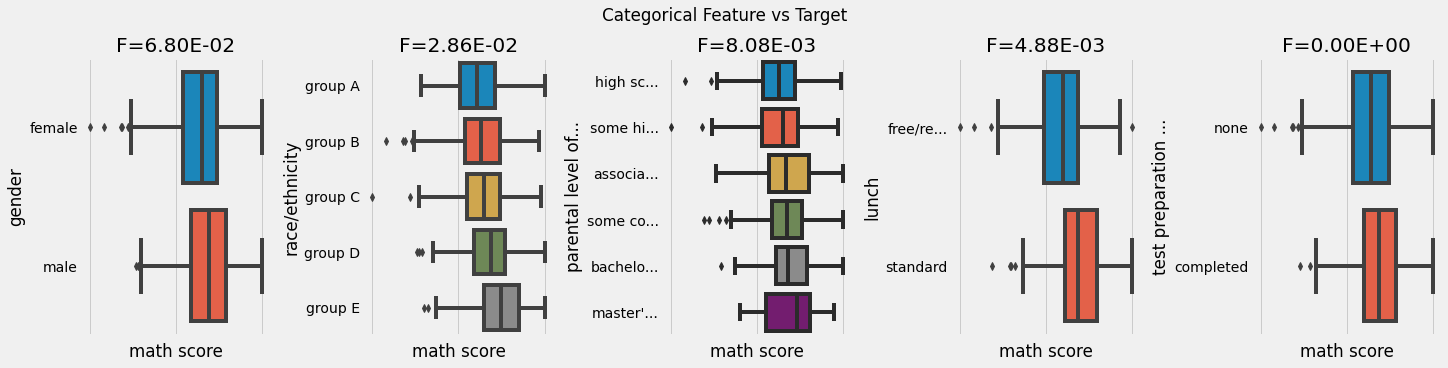

In [11]:
# To see comparison of all other attributes with respect to Math Marks
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'math score') 

Target looks like regression


[array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8e43bad90>,
       dtype=object),
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe8eeb8b3d0>,
       dtype=object)]

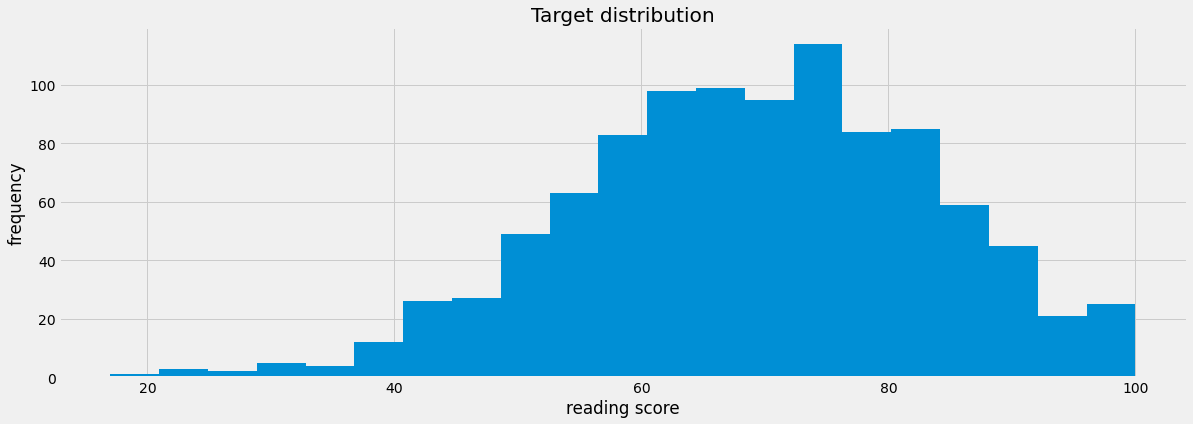

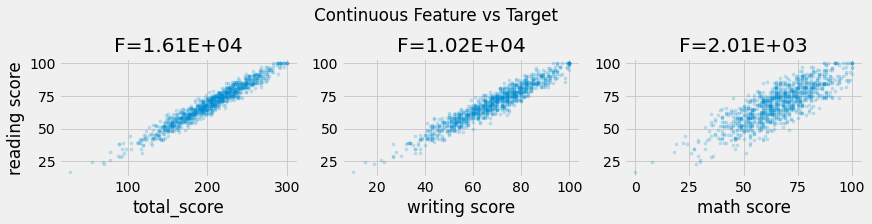

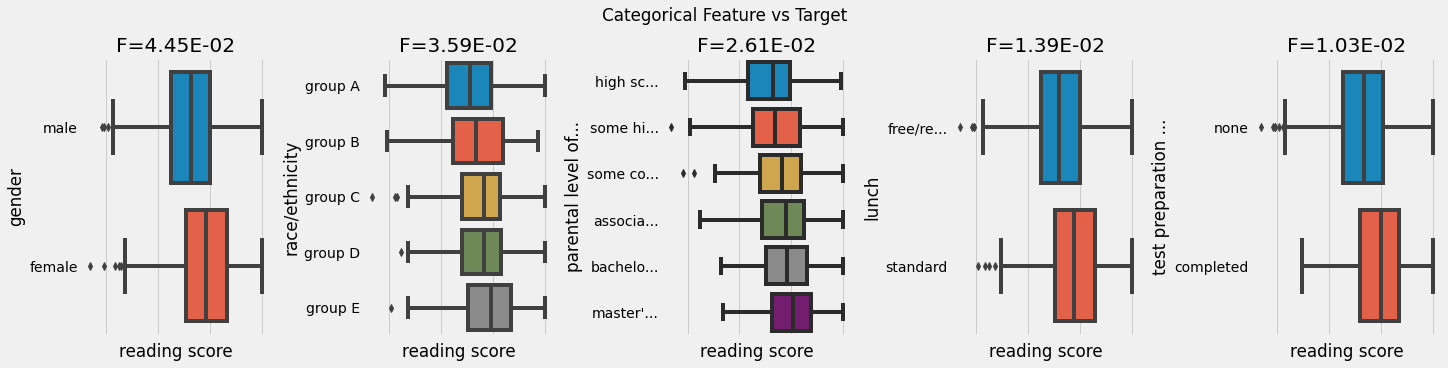

In [12]:
# Comparison of all other attributes with respect to Reading Marks :
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'reading score') 

In [13]:
# Lets check the Effect of Lunch on Student’s Performance
data[['lunch','gender','math score','writing score',
      'reading score']].groupby(['lunch','gender']).agg('median') 

math score  writing score  reading score
lunch        gender                                          
free/reduced female        57.0           68.0           67.0
             male          62.0           59.0           61.0
standard     female        67.0           76.0           75.0
             male          72.0           67.0           67.5

In [14]:
# Lets check the Effect of Test Preparation Course on Scores
data[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['test preparation course','gender']).agg('median')



math score  writing score  reading score
test preparation course gender                                          
completed               female          67             79             78
                        male            73             70             71
none                    female          62             70             71
                        male            67             60             63

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



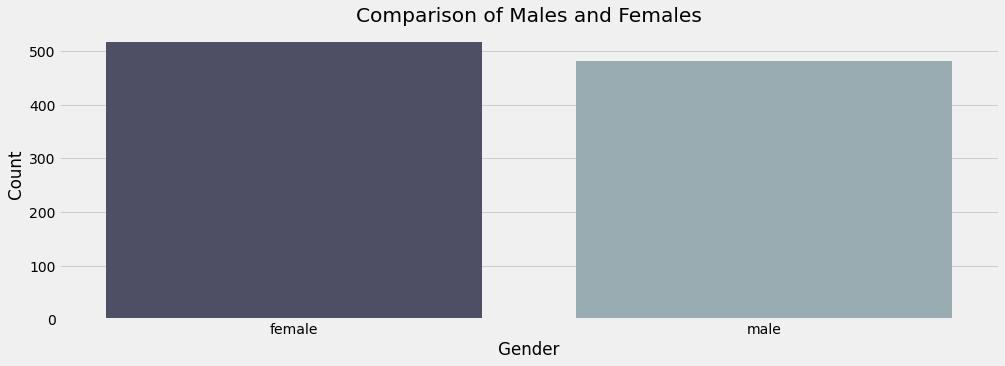

In [15]:
# Data Visualizations
# Visualizing the number of male and female in the data set
plt.rcParams['figure.figsize'] = (15, 5)
sns.countplot(data['gender'], palette = 'bone')
plt.title('Comparison of Males and Females', fontweight = 30)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



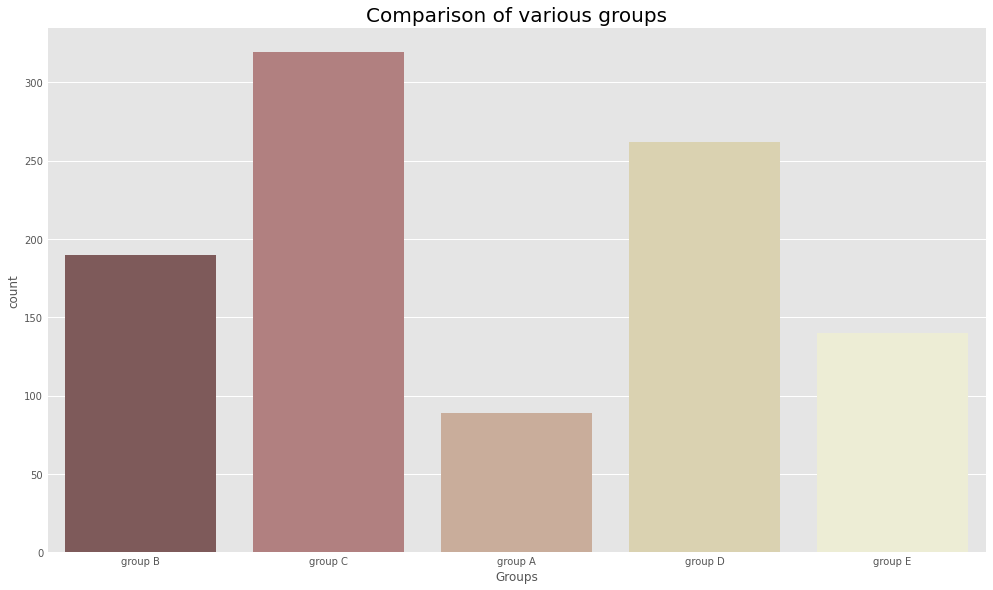

In [16]:
# Visualizing the different groups in the data set
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

sns.countplot(data['race/ethnicity'], palette = 'pink')
plt.title('Comparison of various groups', fontweight = 30, fontsize = 20)
plt.xlabel('Groups')
plt.ylabel('count')
plt.show() 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



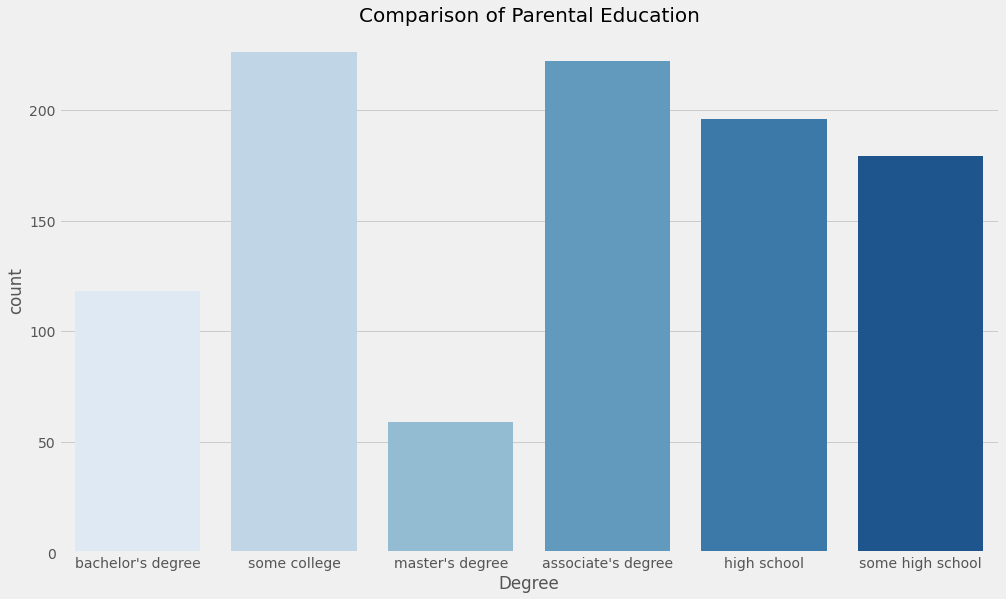

In [17]:
# Visualizing the different parental education levels
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(data['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count') 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



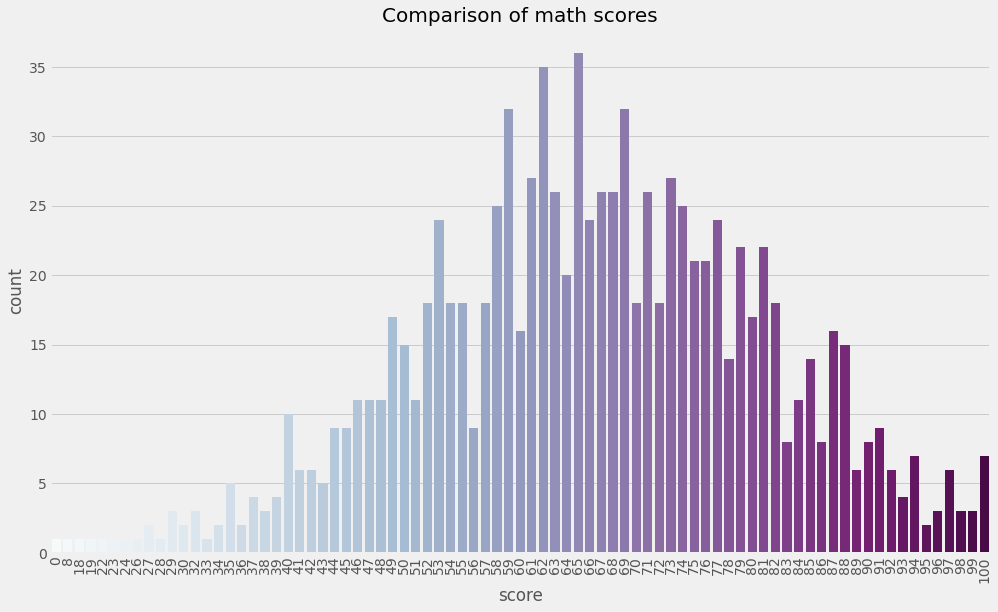

In [18]:
# Visualizing Maths score
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

sns.countplot(data['math score'], palette = 'BuPu')
plt.title('Comparison of math scores', fontweight = 30, fontsize = 20)
plt.xlabel('score')
plt.ylabel('count')
plt.xticks(rotation = 90) 
plt.show()

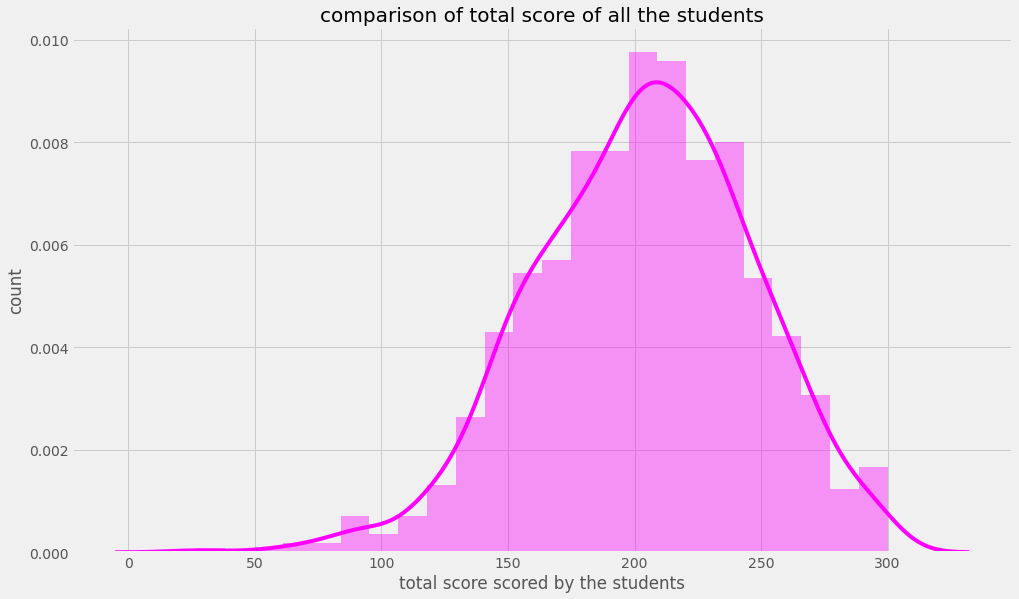

In [19]:
# Computing the total score for each student
import warnings
warnings.filterwarnings('ignore')

data['total_score'] = data['math score'] + data['reading score'] + data['writing score']

sns.distplot(data['total_score'], color = 'magenta')

plt.title('comparison of total score of all the students', fontweight = 30, fontsize = 20)
plt.xlabel('total score scored by the students')
plt.ylabel('count')
plt.show()

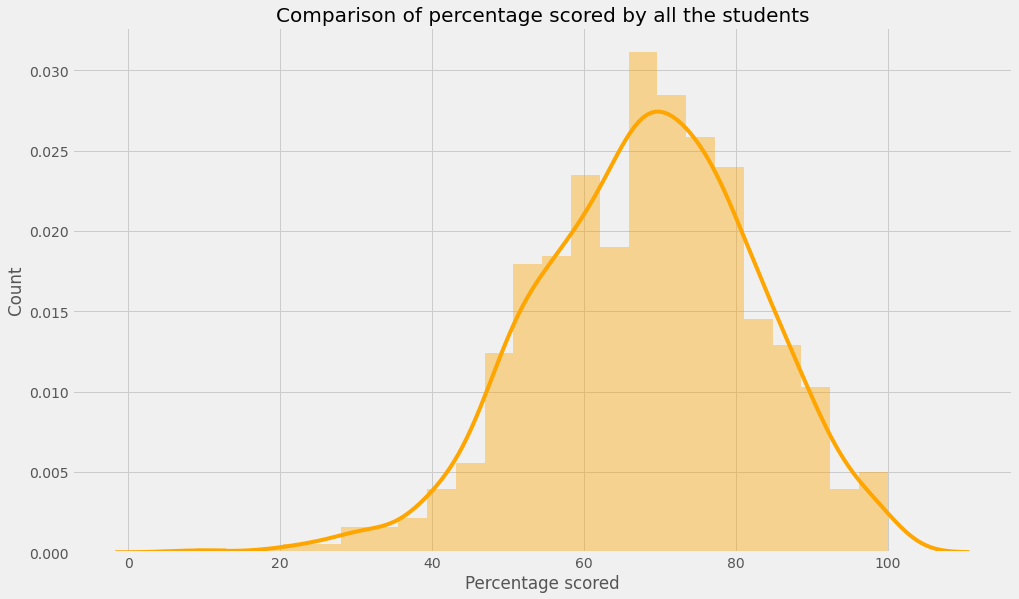

In [20]:
# Computing percentage for each of the students
# importing math library to use ceil
from math import * 
import warnings
warnings.filterwarnings('ignore')

data['percentage'] = data['total_score']/3

for i in range(0, 1000):
    data['percentage'][i] = ceil(data['percentage'][i])

plt.rcParams['figure.figsize'] = (15, 9)
sns.distplot(data['percentage'], color = 'orange')

plt.title('Comparison of percentage scored by all the students', fontweight = 30, fontsize = 20)
plt.xlabel('Percentage scored')
plt.ylabel('Count')
plt.show()

In [21]:
def getgrade(percentage):
  
  if(percentage >= 90):
    return 'O'
  if(percentage >= 80):
    return 'A'
  if(percentage >= 70):
    return 'B'
  if(percentage >= 60):
    return 'C'
  if(percentage >= 40):
    return 'D'
  else :
    return 'E'

data['grades'] = data.apply(lambda x: getgrade(x['percentage']), axis = 1 )

data['grades'].value_counts() 


B    260
C    252
D    248
A    156
O     58
E     26
Name: grades, dtype: int64

In [22]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()

In [24]:
data['test preparation course'] = le.fit_transform(data['test preparation course'])
data['lunch'] = le.fit_transform(data['lunch'])
data['race/ethnicity'] = data['race/ethnicity'].replace('group A', 1)
data['race/ethnicity'] = data['race/ethnicity'].replace('group B', 2)
data['race/ethnicity'] = data['race/ethnicity'].replace('group C', 3)
data['race/ethnicity'] = data['race/ethnicity'].replace('group D', 4)
data['race/ethnicity'] = data['race/ethnicity'].replace('group E', 5)
data['parental level of education'] = le.fit_transform(data['parental level of education'])

In [25]:
data['pass_math'] = le.fit_transform(data['math score'])



In [26]:
data['pass_reading'] = le.fit_transform(data['reading score'])

In [27]:
data['pass_writing'] = le.fit_transform(data['writing score'])

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
grades_encoded = le.fit_transform(data['grades'])
print(grades_encoded)

[1 0 5 3 1 1 5 3 2 3 3 3 1 1 3 1 0 4 3 3 2 1 3 1 1 1 2 1 2 2 1 2 2 3 0 0 0
 3 0 3 3 2 3 2 3 3 2 1 2 0 3 1 3 0 0 4 0 3 3 4 1 4 2 1 3 2 3 2 3 3 2 2 3 3
 3 3 4 0 2 2 3 3 3 2 4 1 0 1 2 0 1 4 1 3 0 0 2 2 2 2 1 1 0 3 5 2 5 2 2 2 0
 3 3 3 5 1 0 0 3 2 0 5 5 3 1 5 2 1 0 3 0 3 1 0 1 3 3 2 2 2 1 2 3 3 0 4 0 2
 1 5 2 1 2 3 2 0 1 2 1 2 1 0 3 3 0 5 3 1 1 1 1 0 0 2 3 0 3 1 2 5 2 3 3 2 3
 2 1 2 3 0 2 0 2 2 0 3 2 3 3 1 1 1 1 2 3 1 2 1 1 2 0 4 3 3 0 0 0 4 1 3 2 0
 2 0 2 3 1 3 2 5 2 3 1 0 0 1 2 2 3 0 2 0 3 3 1 1 0 2 2 2 3 1 2 1 3 2 2 1 1
 1 1 1 3 5 1 3 1 1 5 1 2 3 3 2 0 1 5 2 1 2 3 3 1 1 3 0 0 0 0 1 1 1 2 1 1 2
 3 1 3 0 0 3 1 1 1 2 0 3 2 3 1 2 2 2 2 2 0 1 2 2 1 0 1 3 3 0 2 4 1 3 2 3 3
 0 5 2 1 3 4 3 3 2 1 2 1 1 2 0 1 1 2 3 1 3 2 2 2 3 2 0 2 0 3 4 3 3 2 2 3 0
 1 2 1 5 2 3 0 5 1 2 0 5 1 3 3 1 2 2 2 1 2 1 1 3 1 3 2 5 2 3 2 3 3 5 3 2 2
 0 3 0 1 0 2 2 2 1 1 1 2 3 5 2 3 1 4 2 0 2 3 2 2 2 3 3 2 3 2 1 3 0 1 0 2 1
 1 1 2 0 3 1 1 5 1 3 3 3 0 3 5 2 3 3 1 0 2 0 4 2 0 0 0 2 0 2 5 1 2 1 2 1 1
 3 2 3 3 1 3 1 3 0 1 2 0 

In [31]:
data['encoded_grades'] = grades_encoded
print(data)

     gender  race/ethnicity  ...  pass_writing  encoded_grades
0    female               2  ...            50               1
1    female               3  ...            64               0
2    female               2  ...            69               5
3      male               1  ...            20               3
4      male               3  ...            51               1
..      ...             ...  ...           ...             ...
995  female               5  ...            71               5
996    male               3  ...            31               3
997  female               3  ...            41               2
998  female               4  ...            53               1
999  female               4  ...            62               0

[1000 rows x 15 columns]


In [32]:
data['grades'] = data['encoded_grades']



In [33]:
gender_encoded = le.fit_transform(data['gender'])
print(gender_encoded)

[0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0
 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 0 1 0 1
 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0
 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1
 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1
 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1
 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0
 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1
 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0
 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1
 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0
 1 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 0 1 1 0 1 1 0 0 0 

In [34]:
data['encoded_gender'] = gender_encoded
print(data)

     gender  race/ethnicity  ...  encoded_grades  encoded_gender
0    female               2  ...               1               0
1    female               3  ...               0               0
2    female               2  ...               5               0
3      male               1  ...               3               1
4      male               3  ...               1               1
..      ...             ...  ...             ...             ...
995  female               5  ...               5               0
996    male               3  ...               3               1
997  female               3  ...               2               0
998  female               4  ...               1               0
999  female               4  ...               0               0

[1000 rows x 16 columns]


In [35]:
data['gender'] = data['encoded_gender']

In [36]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,percentage,grades,pass_math,pass_reading,pass_writing,encoded_grades,encoded_gender
0,0,2,1,1,1,72,72,74,218,73.0,1,52,44,50,1,0
1,0,3,4,1,0,69,90,88,247,83.0,0,49,62,64,0,0
2,0,2,3,1,1,90,95,93,278,93.0,5,70,67,69,5,0
3,1,1,0,0,1,47,57,44,148,50.0,3,27,29,20,3,1
4,1,3,4,1,1,76,78,75,229,77.0,1,56,50,51,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,5,3,1,0,88,99,95,282,94.0,5,68,70,71,5,0
996,1,3,2,0,1,62,55,55,172,58.0,3,42,27,31,3,1
997,0,3,2,0,0,59,71,65,195,65.0,2,39,43,41,2,0
998,0,4,4,1,0,68,78,77,223,75.0,1,48,50,53,1,0


In [37]:
data.isnull().sum()>0

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
total_score                    False
percentage                     False
grades                         False
pass_math                      False
pass_reading                   False
pass_writing                   False
encoded_grades                 False
encoded_gender                 False
dtype: bool

In [38]:
data.dropna()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,percentage,grades,pass_math,pass_reading,pass_writing,encoded_grades,encoded_gender
0,0,2,1,1,1,72,72,74,218,73.0,1,52,44,50,1,0
1,0,3,4,1,0,69,90,88,247,83.0,0,49,62,64,0,0
2,0,2,3,1,1,90,95,93,278,93.0,5,70,67,69,5,0
3,1,1,0,0,1,47,57,44,148,50.0,3,27,29,20,3,1
4,1,3,4,1,1,76,78,75,229,77.0,1,56,50,51,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,5,3,1,0,88,99,95,282,94.0,5,68,70,71,5,0
996,1,3,2,0,1,62,55,55,172,58.0,3,42,27,31,3,1
997,0,3,2,0,0,59,71,65,195,65.0,2,39,43,41,2,0
998,0,4,4,1,0,68,78,77,223,75.0,1,48,50,53,1,0


In [39]:
data.fillna(data.mean(), inplace=True)

In [40]:
# Data Preparation
# Splitting the dependent and independent variables
x = data.iloc[:,:14]
y = data.iloc[:,13]

In [42]:
print(x.shape)
print(y.shape)

(1000, 14)
(1000,)


In [43]:
# Splitting the data set into training and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 45)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 14)
(750,)
(250, 14)
(250,)


In [44]:
# importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [45]:
# creating a scaler
mm = MinMaxScaler()

In [46]:

# feeding the independent variable into the scaler
x_train = mm.fit_transform(x_train)
x_test = mm.transform(x_test)

In [47]:
# Applying principal components analysis
from sklearn.decomposition import PCA

In [48]:
# creating a principal component analysis model
pca = PCA(n_components = None)

In [49]:
# feeding the independent variables to the PCA model
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [50]:
# visualising the principal components that will explain the highest share of variance
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[2.77680447e-01 2.02694788e-01 1.83295932e-01 1.23013031e-01
 9.74142956e-02 6.48070947e-02 4.43704376e-02 4.38192477e-03
 2.22295542e-03 1.00705815e-04 9.89989345e-06 5.81240265e-06
 2.67650700e-06 2.97257622e-33]


In [52]:
# creating a principal component analysis model
pca = PCA(n_components = 2)

In [58]:
# feeding the independent variables to the PCA model
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [59]:
# Modelling
# Logistic Regression
from sklearn.linear_model import  LogisticRegression

In [60]:
model = LogisticRegression()

In [82]:
x_train

array([[-0.08897966,  0.61828964],
       [ 0.62187207,  0.69836437],
       [ 0.01409171, -0.59663811],
       ...,
       [-0.86725905,  0.14801929],
       [-0.12028544,  0.58690381],
       [-0.33349761, -0.71010963]])

In [83]:
y_train

116    58
902    17
549    45
327     2
164    67
       ..
544    42
892    49
643    56
414    55
971    45
Name: pass_writing, Length: 750, dtype: int64

In [66]:
# feeding the training data to the model
model.fit(x_train, y_train)

LogisticRegression()

In [67]:
# predicting the test set results
y_pred = model.predict(x_test)

In [68]:
# calculating the classification accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.072
Testing Accuracy : 0.056


In [69]:
# Printing the confusion matrix

from sklearn.metrics import confusion_matrix

In [70]:
# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

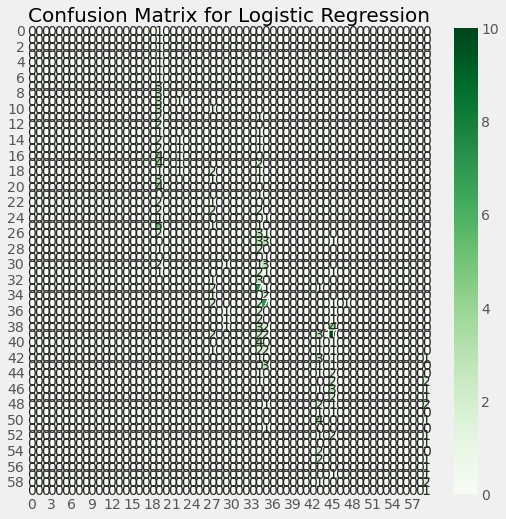

In [71]:
# printing the confusion matrix
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'Greens')
plt.title('Confusion Matrix for Logistic Regression', fontweight = 30, fontsize = 20)
plt.show()

In [72]:

from sklearn.ensemble import RandomForestClassifier

In [73]:
# creating a model
model = RandomForestClassifier()

In [74]:
# feeding the training data to the model
model.fit(x_train, y_train)

RandomForestClassifier()

In [75]:
# predicting the x-test results
y_pred = model.predict(x_test)

In [76]:
# calculating the accuracies
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))


Training Accuracy : 1.0
Testing Accuracy : 0.092


In [77]:

from sklearn.metrics import confusion_matrix

In [78]:

# creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

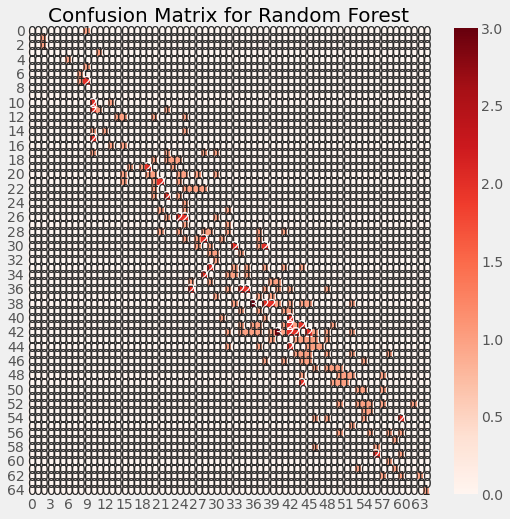

In [79]:

# printing the confusion matrix
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot = True, cmap = 'Reds')
plt.title('Confusion Matrix for Random Forest', fontweight = 30, fontsize = 20)
plt.show()

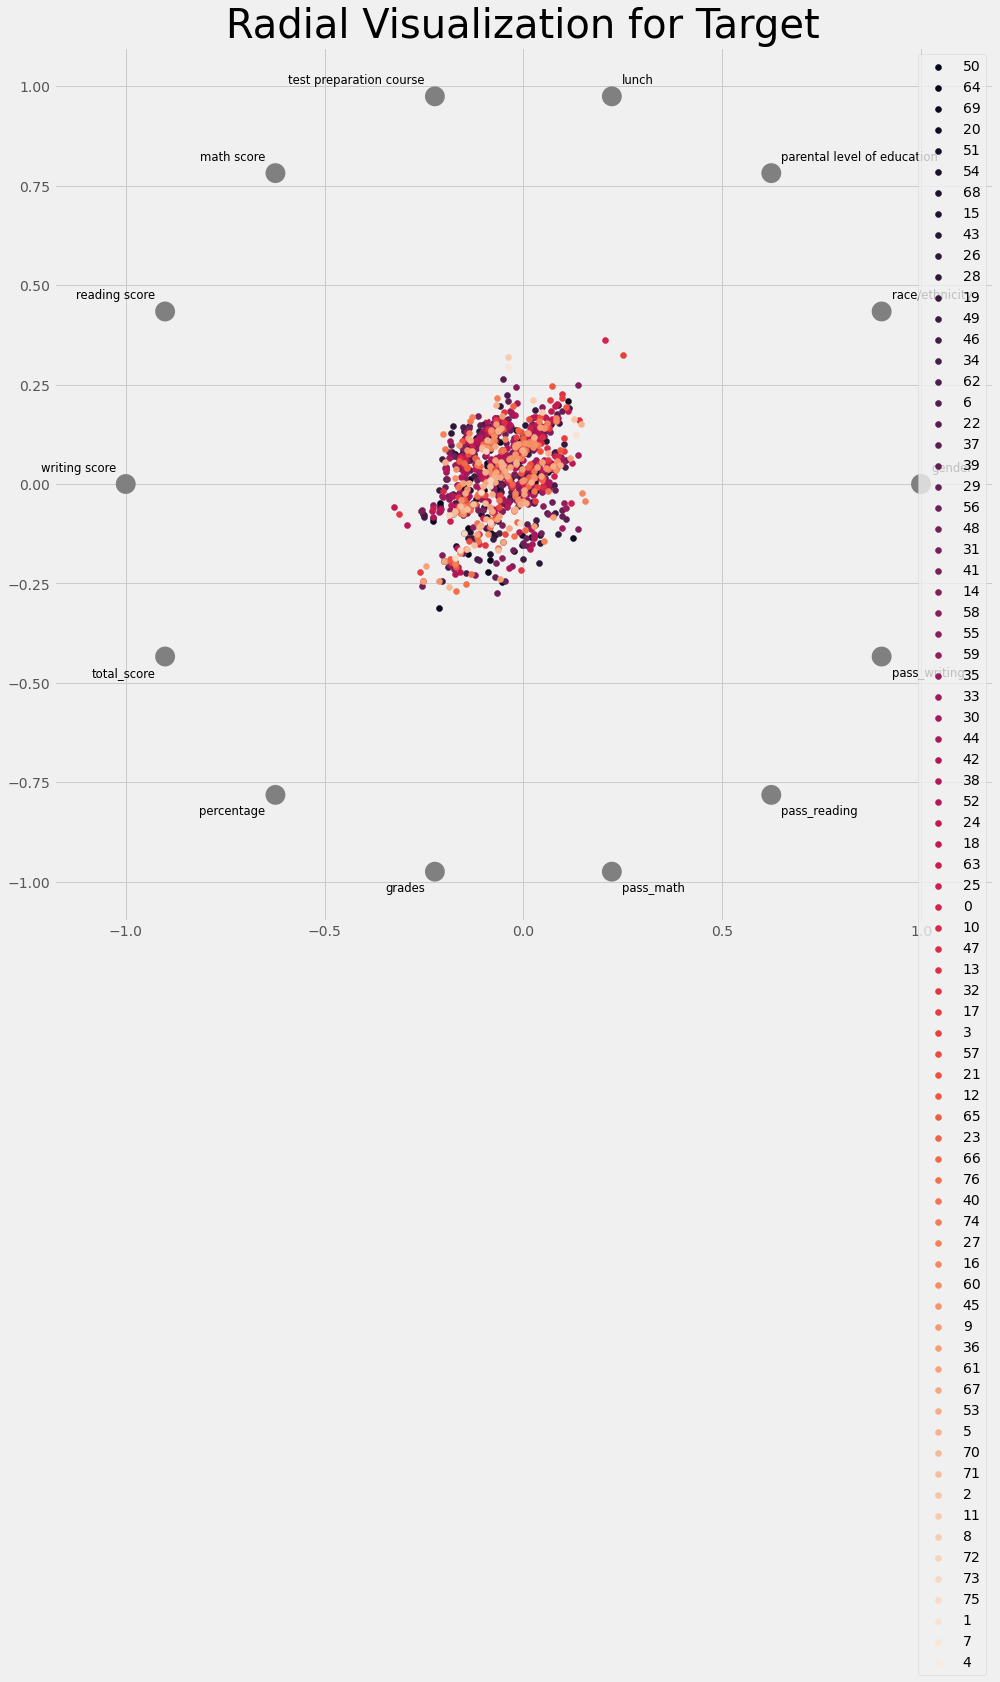

In [80]:
from pandas.plotting import radviz
fig, ax = plt.subplots(figsize=(15, 15))
new_df = x.copy()
new_df["status"] = y
radviz(new_df, "status", ax=ax, colormap="rocket")
plt.title('Radial Visualization for Target', fontsize = 40)
plt.show()